# The Sparks Foundation

### Internship Period : GRIPOCTOBER21

## Task : Preduction Using Supervised Learning

#### Aim : To  Predict Percentage of a student on behalf  of number of Study Hours

# Author  : Satish Dixit

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# below are the ML Libraries
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import sklearn.metrics

In [2]:
#Reading Data from given Remote Link
data= pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [3]:
# checking if there is any null value in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### We can see there is no null value in data

In [4]:
#check the datatypes  of features of data
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
# Checking shape of data
data.shape

(25, 2)

In [6]:
# go through all the information of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.nunique()

Hours     23
Scores    23
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

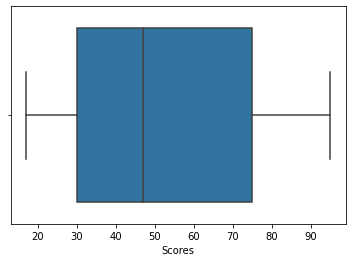

In [8]:
# finding out outliears of data
#ploting boxplot for that
sns.boxplot(data["Scores"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

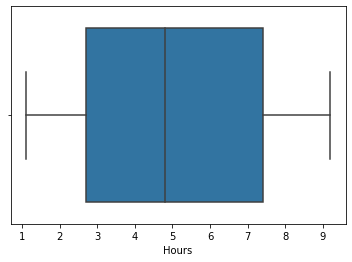

In [9]:
sns.boxplot(data["Hours"])

###  WE can see there is no outliare in the data set.

# Data Visualization

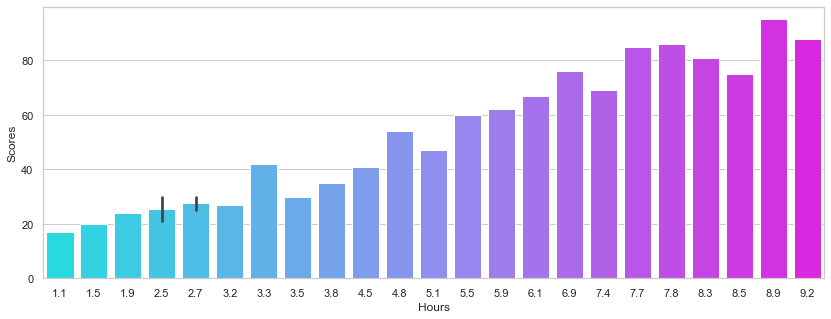

In [10]:
sns.set(style="whitegrid")
f,pg = plt.subplots(1,1,figsize=(14,5))
pg= sns.barplot(x='Hours',y='Scores',data=data,palette='cool')

####  Above Graphs highlights the scored obtained by students after stuides number of hours

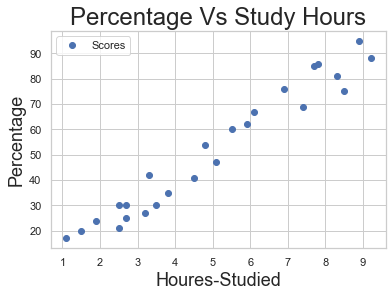

In [11]:
# Plotting Sctterted plot between data elements
data.plot(x='Hours',y='Scores',style='o')
plt.title('Percentage Vs Study Hours', size=24)
plt.xlabel('Houres-Studied',size=18)
plt.ylabel('Percentage',size=18)
plt.show()

## Plotting Regression Line And Regression matrix to confirm the correlation

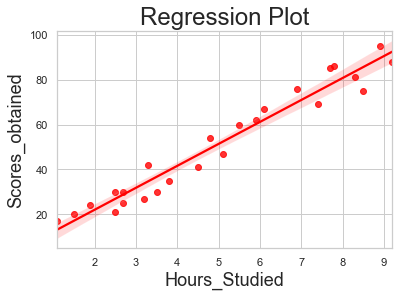

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')
plt.title('Regression Plot',size=24)
plt.xlabel('Hours_Studied',size=18)
plt.ylabel('Scores_obtained',size=18)
plt.show()
print(data.corr())

# Creating Model

In [16]:
model=LinearRegression()

# Spliting data into test and train

In [95]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test =train_test_split(x,y ,test_size=0.2, random_state=0)

## Train The model

In [96]:
print(y_train)
model.fit(x_train,y_train)


[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


LinearRegression()

## Prediction the results

In [97]:
y_pred=model.predict(x_test)
print('Predicted_ Marks',y_pred)

Predicted_ Marks [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Now lets compare the prediction with Actual marks

In [98]:
comp_data=pd.DataFrame({'Actual_Marks': y_test,'Predicted_Marks':y_pred})
comp_data

,Actual_Marks,Predicted_Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating The Model

In [99]:
print('Training Score = :',model.score(x_train,y_train))
print('Testing Score = :',model.score(x_test,y_test))


Training Score = : 0.9515510725211552
Testing Score = : 0.9454906892105354


In [100]:
# Now calculate the accuracy of the model
print('Accuracy : mean Absolute error is:')
mean_absolute_error(y_test,y_pred)

Accuracy : mean Absolute error is:


4.183859899002982

###  Small value of mean absolute error is stand for higly accurate model

##  Score of a student if he studied 9.25 hours daily

In [101]:
Hours=[9.25]
print('answer=', model.predict([Hours]))


answer= [93.69173249]


### RESULT : According to the model if a student studied 9.25 Hr/day He Will get 93.961% marks.